In [ ]:
import sys
sys.path.append('..')
from utilities.utils import extract_frames

extract_frames('../datasets/valencia_open/vide_trimmed2.mp4')

In [ ]:

import torch
# Not good practice in general but in this case makes sense to use * import
from model_functions import *
model = torch.hub.load(repo_or_dir='/Users/jc/.cache/torch/hub/ultralytics_yolov5_master', model='yolov5s', source='local', device='mps')
imgs = []
with open('countours_v2.jsonl', 'w') as f, open('players_position.jsonl', 'w') as  f1:
    for idx in range(1, 2687):
        imgs.append(f'../datasets/danish_open_bestpoint/frame{idx}.png')
    for batch in list_to_batch(imgs):
        print(batch)
        processed_imgs_and_names, bboxes = erase_players(model=model, imgs=batch)
        get_countours_and_save_results(imgs=processed_imgs_and_names, bboxes=bboxes)

In [1]:

import torch
from model_functions import *
import os

model = torch.hub.load(repo_or_dir='/Users/jc/.cache/torch/hub/ultralytics_yolov5_master', model='yolov5s', source='local', device='mps')

directory_path = '../datasets/danish_open_bestpoint/'
filenames = os.listdir(directory_path)
images_paths = sorted(filenames, key=lambda x: int(x.lstrip('frame').rstrip('.png')))
images_paths = [directory_path + image_path for image_path in images_paths]
with open('countours_v2.jsonl', 'w') as f, open('players_position.jsonl', 'w') as  f1:
    improved_get_countours_and_save_results(model=model, imgs=images_paths)


YOLOv5 🚀 2023-4-25 Python-3.10.6 torch-2.0.1 MPS

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


../datasets/danish_open_bestpoint/frame1.png
../datasets/danish_open_bestpoint/frame2.png
../datasets/danish_open_bestpoint/frame3.png
../datasets/danish_open_bestpoint/frame4.png
../datasets/danish_open_bestpoint/frame5.png
../datasets/danish_open_bestpoint/frame6.png
../datasets/danish_open_bestpoint/frame7.png
../datasets/danish_open_bestpoint/frame8.png
../datasets/danish_open_bestpoint/frame9.png
../datasets/danish_open_bestpoint/frame10.png
../datasets/danish_open_bestpoint/frame11.png
../datasets/danish_open_bestpoint/frame12.png
../datasets/danish_open_bestpoint/frame13.png
../datasets/danish_open_bestpoint/frame14.png
../datasets/danish_open_bestpoint/frame15.png
../datasets/danish_open_bestpoint/frame16.png
../datasets/danish_open_bestpoint/frame17.png
../datasets/danish_open_bestpoint/frame18.png
../datasets/danish_open_bestpoint/frame19.png
../datasets/danish_open_bestpoint/frame20.png
../datasets/danish_open_bestpoint/frame21.png
../datasets/danish_open_bestpoint/frame22.p

In [1]:
# Open the JSONL file and read its contents into a list
import json
import pandas as pd
from model_functions import *
import sys
sys.path.append('..')
from model_ball_detection.evaluate import load_means_stds

with open('countours_v2.jsonl', 'r') as f:
    lines = f.readlines()

# Parse each line of the JSONL file into a dictionary
data = []
for line in lines:
    json_data = json.loads(line)
    data.append(json_data)

# Create a pandas DataFrame from the list of dictionaries
df = pd.DataFrame(data)
print(df.head())
model_path = 'model_v2.pth'
model =  torch.load(model_path)
if model_path.split('_')[1].split('.')[0] == 'v1':
    image_frame_diff_path = 'image'
    means, stds = load_means_stds(version='v1')
else:
    image_frame_diff_path = 'image_frame_diff_path'
    means, stds = load_means_stds(version='v2')
    
model.eval()
resnet_contours = df.apply(lambda row: predict_resnet(
    model=model, image_path=row['image'],
    image_frame_diff_path=row[image_frame_diff_path],
    countours=row['countours'],
    max_countour=row['maxCountour'],
    players_bboxes=row['players_bboxes'],
    means=means,
    stds=stds,
    ),
    axis='columns'
    )
df['resnet_countours'] = resnet_contours

                                          image  \
0  ../datasets/danish_open_bestpoint/frame1.png   
1  ../datasets/danish_open_bestpoint/frame2.png   
2  ../datasets/danish_open_bestpoint/frame3.png   
3  ../datasets/danish_open_bestpoint/frame4.png   
4  ../datasets/danish_open_bestpoint/frame5.png   

                      image_frame_diff_path  \
0  ./definitive_frame_diff/frame_diff_1.png   
1  ./definitive_frame_diff/frame_diff_2.png   
2  ./definitive_frame_diff/frame_diff_3.png   
3  ./definitive_frame_diff/frame_diff_4.png   
4  ./definitive_frame_diff/frame_diff_5.png   

                                      players_bboxes  \
0  [[[526, 666], [567, 718]], [[526, 666], [567, ...   
1  [[[843, 219], [879, 338]], [[843, 219], [879, ...   
2  [[[845, 220], [878, 338]], [[845, 220], [878, ...   
3  [[[844, 222], [877, 338]], [[844, 222], [877, ...   
4  [[[844, 225], [878, 341]], [[844, 225], [878, ...   

                                           countours  \
0  [{'area': 105.

point with coordinates (960, 43) no quadrant found
point with coordinates (960, 43) no quadrant found
point with coordinates (960, 371) no quadrant found
point with coordinates (960, 121) no quadrant found
point with coordinates (960, 151) no quadrant found
point with coordinates (620, 540) no quadrant found
      quadrant  quadrant
0          1.0       NaN
21         4.0       1.0
32         2.0       4.0
34         4.0       2.0
37         2.0       4.0
...        ...       ...
2291       1.0       3.0
2300       3.0       1.0
2311       1.0       3.0
2312       3.0       1.0
2314       1.0       3.0

[139 rows x 2 columns]
-163 -252
-623 179
543 -282
17 172
383 -43
122 96
332 -305
-806 629
49 92
-17 -16
423 -553
-17 399
191 -403
-192 403
235 -384
-234 384
373 -470
-844 498
512 -568
-274 637
613 -497
-476 437
481 -367
-325 390
321 -455
-918 396
861 -351
-778 411
798 -393
-83 142
123 -178
-128 193
-939 -226
-330 124
11 -107
-33 67
-30 -46
323 243
-407 -215
519 266
-490 -312
580 231
15

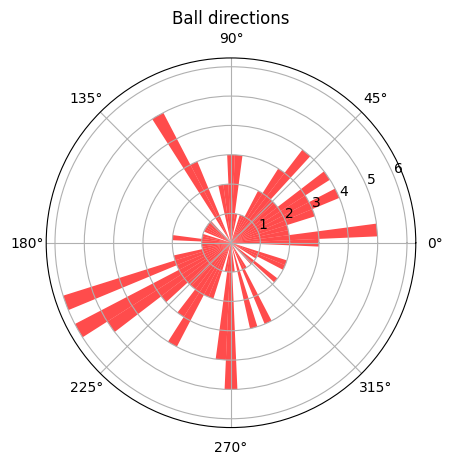

Plot saved as ball_positions.png


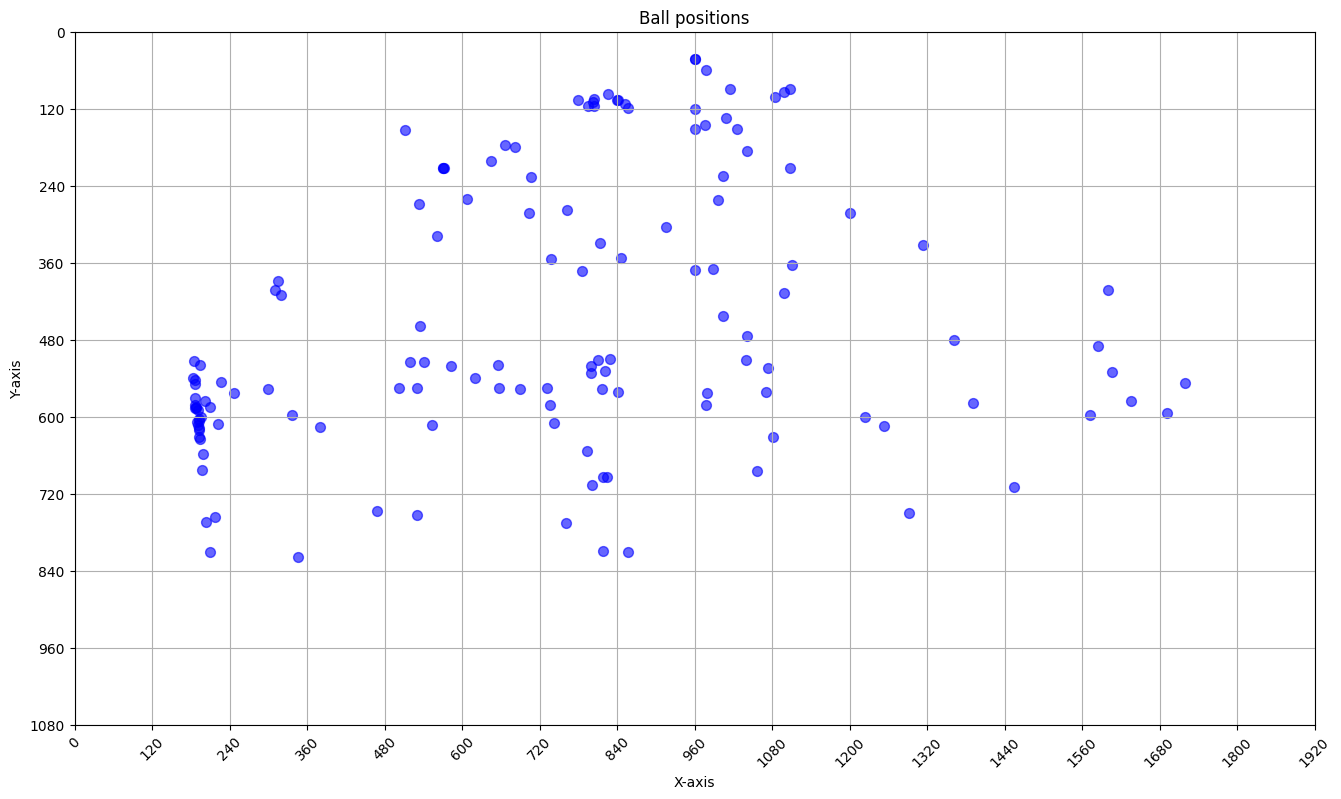

In [3]:
def create_polar_bar_chart_with_transparency(angles_degrees, num_bins, transparency=1, save_path=None):
    # Define the bin boundaries in degrees
    bin_boundaries = np.linspace(0, 360, num_bins + 1)

    # Create the polar bar chart using Matplotlib
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

    # Calculate the histogram using np.histogram
    hist, bin_edges = np.histogram(angles_degrees, bins=bin_boundaries)

    # Convert bin boundaries to radians
    bin_boundaries_radians = np.radians(bin_boundaries)

    # Plot polar bar chart with transparency and red color
    for i in range(num_bins):
        start_angle = bin_boundaries_radians[i]
        end_angle = bin_boundaries_radians[i + 1]
        ax.bar(x=[start_angle], height=[hist[i]], width=[end_angle - start_angle],
               bottom=0, alpha=transparency, color='red')

    # Set title and save the figure if a save path is provided
    plt.title("Ball directions")
    if save_path:
        plt.savefig(save_path)

    # Show the plot
    plt.show()
def plot_surface_points(df, save_filename=None):
    """
    Plot points in a surface from a DataFrame containing 'resnet_contours' field.

    Parameters:
        df (pandas.DataFrame): The DataFrame containing 'resnet_contours' dictionary with 'x' and 'y' components.
        save_filename (str, optional): File name to save the plot. If None, the plot will not be saved. Default is None.
    """
    # Create a scatter plot
    plt.figure(figsize=(16, 9))  # Adjust the figure size as needed
    for index, row in df.iterrows():
        x = row['resnet_countours']['x']
        y = row['resnet_countours']['y']
        plt.scatter(x, y, c='blue', s=50, alpha=0.6)
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Ball positions')
    plt.yticks(range(0, 1080 + 120, 120))
    plt.xticks(range(0, 1920 + 120, 120), rotation=45)
    plt.ylim((1080, 0))
    plt.xlim((0, 1920))
    plt.title('Ball positions')
    plt.grid(True)
    
    if save_filename is not None:
        plt.savefig(save_filename, bbox_inches='tight')
        print(f"Plot saved as {save_filename}")
    
    plt.show()
def determine_quadrant(point: dict):
    x = point['x']
    y =  point['y']
    X = 1920
    Y = 1080
    X_half = 1920/2
    Y_half = 1080/2

    # First quadrant
    if x < X_half and y < Y_half:
        quadrant = 1
    # Second quadrant
    elif x > X_half and y < Y_half:
        quadrant = 2
    elif x < X_half and y > Y_half:
        quadrant = 3
    elif x > X_half and y > Y_half:
        quadrant = 4 
    else:
        print(f'point with coordinates {x,y} no quadrant found')
        return None   
    return int(quadrant)

def compute_direction(point1: dict, point2: dict):
    if point1 == None or point2 == None:
        return None
    v1 = point2['x'] - point1['x']
    v2 = point2['y'] - point1['y']
    
    # we don't care about r, just theta, so set r to the same value for all observations, r = 1
    r = 1
    try:
        theta = np.arctan(abs(v2)/abs(v1))
    except ZeroDivisionError:
        return None
    print(v1, v2)
    theta = theta * 360/(2 * np.pi)
    if v2 <= 0 and v1 <= 0:
        theta_r = 180 - theta
    elif v2 >= 0 and v1 <= 0:
        theta_r = 180 + theta
    elif v2 <= 0  and v1 >= 0:
        theta_r = theta
    elif v2 >= 0 and v1 >= 0:
        theta_r = 360 - theta
    return r, theta_r

def clean_consecutive_quadrants(df: pd.DataFrame):
    previous_quadrant = df['quadrant'].iloc[0]
    indices_to_drop = []
    for i in range(1, len(df['quadrant'])):
        current_quadrant = df['quadrant'].iloc[i]
        if current_quadrant == previous_quadrant:
            indices_to_drop.append(i)
        elif (current_quadrant == 1 and previous_quadrant == 2) or (current_quadrant == 2 and previous_quadrant == 1) or (current_quadrant == 3 and previous_quadrant == 4) or (current_quadrant == 4 and previous_quadrant == 3) :
            indices_to_drop.append(i)
        else:
            previous_quadrant = current_quadrant
    return indices_to_drop
main_df = df.drop(['countours', 'image_frame_diff_path', 'maxCountour'], axis=1)
main_df = main_df[(main_df.resnet_countours != None) & (  main_df.resnet_countours.notnull())]
main_df = main_df.reset_index()
main_df['quadrant'] = main_df['resnet_countours'].apply(determine_quadrant)
indices = clean_consecutive_quadrants(main_df)
main_df = main_df.drop(index=indices)
main_df_shifted = main_df.shift(1)
main_df_shifted = main_df_shifted.rename(columns={'resnet_countours': 'resnet_countours_shifted'})
main_df_concatenated = pd.concat([main_df, main_df_shifted], axis=1)
print(main_df_concatenated['quadrant'])
directions_df = main_df_concatenated.apply(lambda row: compute_direction(point1=row['resnet_countours'], point2=row['resnet_countours_shifted']), axis=1, result_type='expand')
directions_df = directions_df.dropna()
directions_df = directions_df.apply(lambda x: pd.Series(x))
directions_df.columns = ['r', 'theta']
import numpy as np
import matplotlib.pyplot as plt






create_polar_bar_chart_with_transparency(angles_degrees=directions_df['theta'], num_bins=int(360/5), transparency=0.7, save_path='polar_test_bar.png')
plot_surface_points(main_df, save_filename='ball_positions.png')